<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

---

# Logistic Regression

- 훈련/검증/테스트(train/validate/test) 데이터를 분리하는 이유를 명확히 이해하고 사용합니다.
- 분류(classification) 문제와 회귀문제의 차이점을 파악하고 문제에 맞는 모델을 사용 할 수 있습니다.
- 로지스틱회귀(Logistic regression)를 이해하고 모델을 학습할 수 있습니다.

### Warm up

#### 다음 영상을 시청하세요:
- [Machine Learning: Validation vs Testing](https://youtu.be/pGlQLMPI46g)
    - 검증데이터의 용도와 테스트 데이터의 용도를 설명해 보세요.
    
- [Overfitting 4: training, validation, testing](https://youtu.be/4wGquWG-vGw)
    - 테스트 데이터로 예측한 후 모델을 수정해 또 테스트 데이터로 예측하는 행동은 왜 피해야 할까요?

- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8&feature=youtu.be)
    - 로지스틱회귀와 선형회귀분석과 차이점이 무엇인가요?

#### 다음 글을 읽어 보세요:
- [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
    - 시계열(time series) 데이터를 훈련/검증/테스트 세트로 나눌 때 무엇을 주의해야 하나요?

---

## 데이터를 훈련/검증/테스트(train/validate/test) 세트로 나누어 봅시다.

### 타이타닉호 생존자 예측

캐글(Kaggle) 에서 초기 입문자들에게 유명한 Titanic: Machine Learning from Disaster 데이터로 학습을 진행해 보겠습니다.
- [Kaggle has used the Titanic dataset](https://www.kaggle.com/c/titanic/data)

캐글은 참가자들에게 데이터셋을 보통 훈련/테스트로 나누어 제공합니다.

In [198]:
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

테스트데이터는 특성의 개수가 한 개 적습니다.

In [199]:
print("train features: ", train.shape[1])
print("test features: ", test.shape[1])

train features:  12
test features:  11


어떤 특성이 test 데이터에 없는 타겟인지 확인해 보겠습니다.

In [200]:
print("target col: ", train.columns.difference(test.columns)[0])

target col:  Survived


캐글에서는 보통 훈련데이터와 테스트데이터를 분리하여 제공합니다. 그런데 테스트 데이터에서는 타겟정보를 제외해 놓았습니다.

- 캐글은 테스트 데이터에 대한 타겟 정보도 가지고 있을 텐데 **왜 테스트 데이터의 타겟 정보를 제공하지 않을까요?**

    - 가장 큰 이유는 모델의 일반화 성능을 올바르게 측정하기 위해서 입니다.


그래서 여러분은 훈련 데이터에서의 일부분을 검증 데이터로 구분한 다음 여러분이 만든 모델의 성능을 따로 테스트 하여야 합니다.

- 그렇다면 데이터를 훈련/테스트 세트로 나누는 것에 더해 **왜 검증세트가 필요한 것일까요?**
    - 왜냐하면 훈련세트로 모델을 한 번에 완전하게 학습시키기가 어렵기 때문입니다. 훈련세트로 다르게 튜닝된 여러 모델들을 학습한 후 어떤 모델이 학습이 잘 되었는지 검증하고 선택하는 과정이 필요합니다.
    
이렇게 훈련/검증세트로 좋은 모델을 만들어 낸 후 최종적으로 테스트세트에는 단 한번의 예측테스트를 진행합니다. 최종테스트 결과가 마음에 들지 않는다고 모델을 또 수정하여 테스트 세트를 더 잘 예측하는 모델을 만든다면 그 모델은 테스트세트에 과적합하여 일반화 성능이 떨어지게 될 수 있습니다.



### 훈련/검증/테스트 세트로 나누는 것은 머신러닝 모델 학습에서 매우 중요합니다. 

- 훈련데이터는 모델을 Fit 하는데 사용합니다.
- 검증데이터는 예측 모델을 선택하기 위해서 예측의 오류를 측정할 때 사용합니다. 
- 테스트데이터는 일반화 오류를 평가하기 위해 선택된 모델에 한하여 마지막에 한 번 사용합니다. 테스트세트는 훈련이나 검증과정에서 사용하지 않도록 주의해야 합니다. 

테스트데이터가 유출(leak)이 되어 훈련/검증과정에 사용이 되면 모델을 잘못 평가하게 됩니다.

#### [모델 검증](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

- train dataset: 모델의 fit하는데 사용하는 데이터 
- validation dataset: 모델이 복잡하고 매우 학습을 잘하는 경우, 훈련 데이터에 overfitting이 되는 것을 확인하고 새롭게 모델을 만들거나 다른 모델을 선택하는데 사용하는 데이터 셋
- test dataset: 여러 모델을 만들고 튜닝하고 수정하고 나서 검증 데이터에서 가장 성능이 좋은 모델을 만들고 나서 마지막으로 일반화를 테스트하는데 사용. 

- 보통 검증 데이터의 성능보다 테스트 데이터에서 성능이 떨어진다.
왜냐하면, 검증 데이터를 이용해 계속 모델을 개선해나가는 과정중에 직접적으로 학습에 이용되지는 않지만 여러번 성능 측정을 하면서 검증 데이터에서 모델이 좋은 성능을 내도록 튜닝이 되었기 때문이다. 

- 우리가 주의해야 하는 것은 훈련 검정 과정에서 테스트 데이터가 절대로 사용되지 않도록 하는 것이다.

여러분이 학습 모델을 개발할 때, **모델선택(Model selection)** 을 수행해야 합니다.
이때 **하이퍼파라미터(hyperparameter)** 튜닝을 하게 되는데 튜닝의 효과를 확인하기 위해서 검증세트가 필요합니다. 테스트 세트로 하이퍼파라미터 튜닝을 하면 절대로 안됩니다. 데이터가 많을 경우에는 전체 데이터를 훈련/검증/테스트 세트로 나누면 되지만, 상대적으로 데이터 수가 적을 경우 **K-fold 교차검증(k-fold cross-validation)** 을 진행할 수 있습니다. 물론 이때도 테스트 세트는 미리 떼어 놓아야 합니다.

#### 캐글 데이터세트 나누기

캐글에서 우리를 위해 미리 테스트세트를 나누어 주었으니 우리는 훈련데이터를 다시 훈련/검증 세트로 나누면 되겠습니다.

sklearn 함수 train_test_split을 사용해 훈련/검증 세트로 나누어 보겠습니다.

- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [201]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (668, 12)
val shape:  (223, 12)


## 분류(Classification) 문제를 다루어 봅시다

### 분류문제는 회귀문제와 다른 기준으로 기준모델을 설정합니다.
**다수 클래스를 기준모델로 정하는 방법(Majority class baseline)** 에 대해 알아 봅시다.

- 회귀문제에서는 보통 타겟 변수의 **평균**값을 기준모델로 사용합니다.
- 분류문제에서는 보통 타겟 변수에서 가장 **빈번하게 나타나는 범주**를 기준모델로 설정합니다.
- 시계열(time-series) 데이터는 보통 어떤 시점을 기준으로 **이전 시간의 데이터**가 기준모델이 됩니다.


분류문제 에서는 타겟 변수가 편중된 범주비율을 가지는 경우가 많습니다.

- 클래스 1과 0 비율이 9:1인 학습 데이터를 가지고 모델을 만들었는데 모델 예측 정확도가 90% 나왔습니다! 어떻게 이렇게 좋은 성능이 나왔을까요? 이 모델의 성능은 문제가 없는 것 일까요? 불균형한 데이터를 사용해 ML 모델을 만드는데는 상당한 주의가 필요합니다. 

    - 이 데이터는 모델이 무조건 클래스 1만 찍도록 만들면 정확도 90%를 달성할 수 있습니다. 그러므로 이런 경우 클래스 1에 대한 정확도가 90% 인 기준모델을 설정하고 더 좋은 성능을 가지는 모델을 만들기 위해 노력해야 합니다.

- 대다수의 중요한 분류 문제들은 범주들의 비율이 차이가 서로 많이 난다. 편중된 범주 비율을 가지는 경우, 다수 범주를 기준 모델로 사용하지 않으면 모델의 성능을 착각할 수 있다.

#### 분류문제를 풀기전에 항상 먼저 타겟 범주가 어떤 비율을 가지고 있는지 확인해 보아야 합니다.

In [202]:
# 타겟을 정합니다
# survived => 0 = No, 1 = Yes
target = 'Survived'

In [203]:
# 타겟 데이터 범주의 비율을 확인합니다.
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.625749
1    0.374251
Name: Survived, dtype: float64

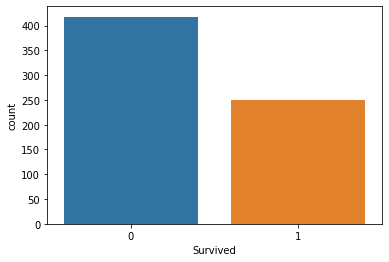

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

#### (분류문제의 기준모델) 범주 0 (majority class)으로 모든 예측을 수행해 보겠습니다.

In [205]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

#### 분류에서는 회귀와 다른 평가지표(evaluation metrics)를 사용합니다. 
[scikit-learn, Scoring functions](https://scikit-learn.org/stable/modules/model_evaluation.html)
- 절대로 _회귀_ 평가지표를 _분류_에 사용하시면 안됩니다. 그 반대도 마찬가지 입니다.

- 정확도([Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)) 는 분류문제에서 사용하는 평가지표입니다.

Accuracy = $\frac{올바르게 예측한 수} {전체 예측 수}$ = $\frac{TP + TN} {P + N}$
- [Proportion of correct classifications](https://en.wikipedia.org/wiki/Confusion_matrix)



이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.

In [206]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.625748502994012


In [207]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5874439461883408


## 로지스틱 회귀(Logistic Regression)

### (로지스틱회귀를 사용하기 전에) 분류문제를 선형회귀모델을 사용해 학습하면 어떤 결과가 나오는지 살펴 봅시다

In [208]:
train.describe() # 수치형 데이터에 대한 통계치를 확인할 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,527.000000,668.000000,668.000000,668.000000
mean,443.224551,0.374251,2.303892,29.576376,0.501497,0.405689,32.583071
std,256.363463,0.484292,0.835234,14.118577,1.080701,0.835008,49.782390
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,663.500000,1.000000,3.000000,38.000000,1.000000,0.250000,31.068750
max,891.000000,1.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [209]:
train['Age']

199    24.0
129    45.0
90     29.0
230    35.0
126     NaN
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age, Length: 668, dtype: float64

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 199 to 168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          527 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 87.8+ KB


In [211]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# 숫자형 특성 만 사용하겠습니다. / 다중 회귀 모델 사용
features = ['Pclass', 'Age', 'Fare']
X_train = train[features]
X_val = val[features]

# Age, Cabin의 결측치를 평균 값으로 채웁니다.
from sklearn.impute import SimpleImputer # SimpleImputer - 결측치들을 각 특성의 평균값으로 채워줌. / Linear Regression은 결측값이 존재하는 특성을 사용할 수 없기 때문.

## default, imputing 'mean' value
imputer = SimpleImputer() 
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 학습
linear_model.fit(X_train_imputed, y_train)

# 예측
pred = linear_model.predict(X_val_imputed)

#### 회귀계수들의 수치를 확인해 보겠습니다.

In [212]:
pd.Series(linear_model.coef_, features) 
## 좌석 등급이 올라갈수록 생존율이 떨어진다.
## 나이가 올라갈수록 생존율이 떨어진다. (좌석 등급의 정도보다는 낮지만)
## 수치가 정말 낮지만 가격이 높을 수록 생존율이 높아진다고 할 수 있다.

Pclass   -0.203810
Age      -0.007513
Fare      0.000819
dtype: float64

- Pclass의 경우 높을 수록(2, 3등석) 생존률이 떨어지는 것으로 예상을 할 수 있고

- Age의 경우 많을 수록 생존률이 떨어진다고 볼 수 있겠습니다.

- Fare의 경우는 수치가 작지만 높을 수록 생존률이 올라가네요.

#### 가상으로 테스트 케이스를 만들어 예측을 진행해 보겠습니다
회귀계수를 알고 있으니 무조건 생존할 것 같은 데이터를 만들어 보겠습니다.

Pclass는 낮추고(1등석) 5살의 어린 나이에 비싼 요금을 넣어 보겠습니다. (1, 5, 600) 이 아기는 무조건 생존할 것 같습니다.

In [213]:
test_case = [[1, 5, 600]]
linear_model.predict(test_case) ## 결과를 보니, 생존을 나타내는 1을 훨씬 넘어서는 수치가 나옴. 회귀모델은 이렇게 음수~양수를 아우르는 모든 수치가 나올 수 있기 때문에 생존 :1, 죽음 :0 인지를
                                ## 정확하게 알 수 없다.

array([1.28916042])

- 회귀모델이기 때문에 타겟변수값이 음수에서 양수까지 나타나는데 생존인지 아닌지 분명하게 결과를 알 수 없습니다. 게다가 회귀이기 때문에 분류모델에 사용하는 평가지표를 사용할 수 없습니다.

로지스틱회귀를 사용하면 타겟변수의 범주로 0과 1을 사용할 수 있으며 각 범주의 예측 확률값을 얻을 수 있습니다.

### 로지스틱 회귀모델

#### 로지스틱 회귀모델은 다음 식으로 표현할 수 있습니다.
$$\large P(X)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}$$


$$ 0 \leq P(X) \leq 1$$

exponential의 지수에 회귀모델식이 들어가 있다.

#### 로지스틱회귀는 특성변수를 **로지스틱(시그모이드) 함수** 형태로 표현합니다.
<img src="https://qph.fs.quoracdn.net/main-qimg-6c3393d3dd37f9fdac89e7971126c726" width="500"/>

위의 식이 로지스틱 함수라고 부르기 때문에 P(X)를 나타내는 식을 로지스틱 회귀모델이라고 부른다.

그래서 결과적으로 관측치가 특정 클래스에 속할 확률값으로 계산이 됩니다. 분류문제에서는 확률값을 사용하여 분류를 하는데, 예를들어 확률값이 정해진 기준값 보다 크면 1 아니면 0 이라고 예측을 하게 됩니다.

#### Logit transformation
로지스틱회귀의 계수는 비선형 함수 내에 있어서 직관적으로 해석하기가 어려운데 **오즈(Odds)** 를 사용하면 선형결합 형태로 변환 가능해 보다 쉽게 해석이 가능합니다. 오즈는 **실패확률에 대한 성공확률의 비** 인데 예를들어 odds = 4  이면 성공확률이 실패확률의 4배 라는 뜻입니다. 분류문제에서는 클래스 1 확률에 대한 클래스 0 확률의 비라고 해석하면 되겠습니다.

$Odds = \large \frac{p}{1-p}$, 

p = 성공확률, 1-p = 실패확률

p = 1 일때 odds = $\infty$

p = 0 일때 odds = 0

$\large ln(Odds) = ln(\frac{p}{1-p}) = ln(\frac{\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}{1 - \frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}) = \normalsize \beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p}$

이렇게 오즈에 자연로그를 취해 변환하는 것을 **로짓변환(Logit transformation)** 이라고 합니다. 로짓변환을 통해 비선형형태인 로지스틱함수형태를 선형형태로 만들어 회귀계수의 의미를 해석하기 쉽게 하는데, 특성 X의 증가에 따라 **로짓(ln(odds))**가 얼마나 증가(or감소)했다고 해석을 할 수 있게 됩니다.

>로지스틱함수가 비선형이기때문에 회귀계수의 관계에 대해서 파악하기 어렵다. 그래서 선형형태로 바꿔줘야 한다.

(odds 확률로 해석을 하려면 exp(계수) = p 를 계산해서 특성 1단위 증가당 확률이 p배 증가한다고 해석을 할 수 있습니다.)

여기서 기존 로지스틱형태의 y 값은 0~1의 범위를 가졌다면 로짓은 -$\infty$ ~ $\infty$ 범위를 가지게 됩니다.

<img src="https://i.imgur.com/r2uD4dI.png" />

## 로지스틱회귀 모델을 만들어 보고 선형모델과 비교해 보겠습니다.

In [214]:
## 선형회귀모델을 학습하는 과정과 완전히 동일하다.
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_imputed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

학습된 로지스틱회귀 모델의 score 메소드는 분류 정확도를 리턴합니다.

In [215]:
print('검증세트 정확도', logistic.score(X_val_imputed, y_val))

검증세트 정확도 0.7130044843049327


모든 범주를 0으로 분류하는 기준모델보다 정확도가 높게 나왔습니다. 어느정도 학습이 잘 이루어진 것으로 보여집니다.
예측 결과를 보면 0과 1로 예측 한 것을 확인할 수 있습니다.

In [216]:
pred = logistic.predict(X_val_imputed)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

위에서 만들어 놓은 5살 아이의 테스트 케이스를 사용해 예측을 해 보겠습니다.

In [217]:
logistic.predict(test_case)

array([1])

분류에 기준이 되는 각 클래스에 속할 확률값을 확인할 수 있습니다.

In [218]:
logistic.predict_proba(test_case)

array([[0.01749669, 0.98250331]])

로지스틱회귀의 계수를 확인해 봅시다.

In [219]:
print(features)

# 선형회귀분석과 비교했을 때 회귀계수 수치는 변했지만 방향은 같음을 볼 수 있습니다.
print(logistic.coef_) 

['Pclass', 'Age', 'Fare']
[[-0.90248227 -0.03581619  0.00447486]]


계수가 양수인 경우 생존의 가능성을 높이고 음수인 경우 생존 가능성을 낮추는 것으로 해석할 수 있습니다.

### 타이타닉(Titanic) 데이터의 모든 특성을 사용한 모델을 만들어 봅시다.

데이터를 모델에 적합하기 전에 3 가지 데이터 변환을 수행해보겠습니다.
- 카테고리 데이터 처리를 위해 OneHotEncoder
- 결측치(missing value) 처리를 위한 SimpleImputer
- 특성들의 척도를 맞추기 위해 표준정규분포로 표준화하는(평균=0, 표준편차=1) StandardScaler

In [220]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [221]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S


In [222]:
train['Ticket'].value_counts()

347088              6
S.O.C. 14879        5
382652              5
3101295             5
CA. 2343            5
                   ..
695                 1
324669              1
SOTON/O2 3101272    1
36864               1
14313               1
Name: Ticket, Length: 539, dtype: int64


- 사용 가능한 모든 변수를 선택하겠습니다. : `['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']`

- `PassengerId`, `Name`, `Cabin`, `Ticket`은 왜 사용하지 않을까요?
  - 위와 같은 특성들은 샘플별로 모두 값이 다르기 때문에 일반화를 위한 학습에 전혀 도움이 되지 않기 때문에 뺀다. 
  - Cabin: 결측값이 너무 많고 범주가 너무 많아서 사용하지 않았다.
  - Ticket: 범주가 너무 많아서 사용하지 않았다.
  내가 다시 확인해볼것! value_counts() 등을 사용해서~

학습에 사용할 transformer 대해서 살펴봅시다.
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/categorical-encoding/onehot.html)
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.linear_model.LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [223]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q


In [224]:
pip install category_encoders

In [225]:
from category_encoders import OneHotEncoder ## sklearn에도 onehotencoder가 있지만, category_encoders에 있는 onehotencoder가 더 좋아서 이렇게 사용하게 됨.
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

 

In [226]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
199,2,female,24.0,0,0,13.000,S
129,3,male,45.0,0,0,6.975,S
90,3,male,29.0,0,0,8.050,S


#### 원핫인코딩을 수행합니다.

In [248]:
encoder = OneHotEncoder(use_cat_names=True) # use_cat_names=True -> 특성의 각 범주들의 이름을 column명에 다 사용해준다. ex) Sex_female 심지어, 결측치도 표시됨. Embarked_nan -> 이런 것이 
                                            # category_encoder를 사용하는 이유 
X_train_encoded = encoder.fit_transform(X_train) # fit_transform()은 fit하고 transform 하는 함수를 연달아 호출해서 사용하는 함수이다. 
X_val_encoded = encoder.transform(X_val) # X_val는 fit을 하지 않고 transform을 바로 해주는 이유는 훈련 데이터 수행한 encoding방법과 똑같은 방법으로 검증 데이터를 인코딩하고 싶기 때문. 
                                         # 검증 데이터에도 fit_transform()을 사용하면 검증 데이터에서 범주형의 차이가 발생하면 문제가 될 수 있다.
X_train_encoded.head(3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Embarked_nan
199,2,1,0,24.0,0,0,13.000,1,0,0,0
129,3,0,1,45.0,0,0,6.975,1,0,0,0
90,3,0,1,29.0,0,0,8.050,1,0,0,0


#### 결측치를 평균으로 변환합니다.

In [228]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [255]:
X_val_imputed[:5]

(668, 11) (668, 11)


array([[ 1.    ,  0.    ,  1.    , 42.    ,  0.    ,  0.    , 26.2875,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 21.    ,  0.    ,  0.    ,  8.05  ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 2.    ,  1.    ,  0.    , 24.    ,  1.    ,  2.    , 65.    ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 28.    ,  0.    ,  0.    , 56.4958,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    ,  0.    , 17.    ,  4.    ,  2.    ,  7.925 ,
         1.    ,  0.    ,  0.    ,  0.    ]])

#### 특성값들을 표준화 합니다.

In [230]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [254]:
X_train_scaled

array([[-0.36411341,  1.33976829, -1.33976829, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       ...,
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
         1.98699475, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966]])

평균은 0, 표준편차는 1로 표준화 되었습니다.

In [232]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(1.1168710666887802e-16, 1.0000000000000002)

In [233]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [234]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred) # 3개의 특성을 통해 학습한 것보다 더 좋은 성능을 보인 것을 확인할 수 있었다.

0.7892376681614349

계수들을 확인해 봅시다.

In [235]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients

Pclass         -0.915833
Sex_female      0.662095
Sex_male       -0.662095
Age            -0.559957
SibSp          -0.406466
Parch          -0.015897
Fare            0.078016
Embarked_S     -0.094939
Embarked_Q      0.007684
Embarked_C      0.077224
Embarked_nan    0.188837
dtype: float64

좌석의 등급이 고급일수록, 나이가 어릴 수록, 남성보다는 여성의 생존이 더 높아짐을 계수들의 수치로 확인 할 수 있습니다.

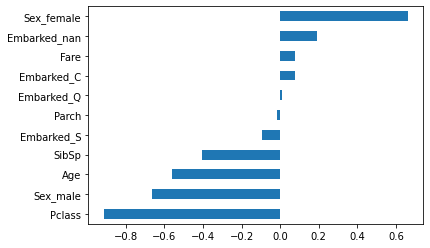

In [261]:
coefficients.sort_values().plot.barh(); # sort_values() -> series or dataframe 정렬 (ascending = True -> default (오름차순))

In [237]:
# 절편(intercept)은 마이너스로 모든 특성이 0인 경우 생존하지 못할 가능성이 높다고 알려주긴 하지만 
# 사실 관측할 수 없는 예시로 해석이 크게 유용하지 않습니다.
model.intercept_

array([-0.71320882])

여러분이 만든 모델을 테스트세트에 적용시켜 예측해 보고 [Kaggle](https://www.kaggle.com/c/titanic) 에 제출해 봅시다.

In [238]:
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_test = model.predict(X_test_scaled)

In [239]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [240]:
submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred_test

In [241]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [242]:
submission.to_csv('submission_titanic.csv', index=False)

## 참고자료

#### Logistic Regression
- [5 Reasons “Logistic Regression” should be the first thing you learn when becoming a Data Scientist](https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4)
- [Logistic Regression Details Pt1: Coefficients](https://youtu.be/vN5cNN2-HWE)
- [Logistic Regression Details Pt 2: Maximum Likelihood](https://youtu.be/BfKanl1aSG0)
- [Probability of passing an exam versus hours of study](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study)


#### Cross Validation

- [Training, Validation, and Testing Data Sets](https://end-to-end-machine-learning.teachable.com/blog/146320/training-validation-testing-data-sets)
- [R for Data Science](https://r4ds.had.co.nz/model-intro.html#hypothesis-generation-vs.hypothesis-confirmation), Hypothesis generation vs. hypothesis confirmation
-[How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
-[Model Evaluation](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)
-[A baseline for classification can be the most common class in the training dataset](https://twitter.com/koehrsen_will/status/1088863527778111488)